In [2]:
%matplotlib inline
# 필요한 패키지들 
import os 
from glob import glob
# PIL는 이미지를 load 할 때, numpy는 array 
from PIL import Image
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model, model_from_json
from matplotlib import pyplot as plt
import pickle
import gzip
import sys

In [3]:
# Hyper Parameter 
data_height = 32 
data_width = 32
channel_n = 3

In [4]:
input_csv = pd.read_csv('input_image/Input.csv')
input_list = input_csv['Path']
base_data_path = "input_image"
input_images = np.zeros((len(input_list), data_height, data_width, channel_n))

In [5]:
for n, path in enumerate(input_list):
    row = input_csv.iloc[n]

    roi_x1 = row['Roi.X1']
    roi_x2 = row['Roi.X2']
    roi_y1 = row['Roi.Y1']
    roi_y2 = row['Roi.Y2']

    full_path = base_data_path + '/' + path
    
    image = Image.open(full_path)
    image = image.crop((roi_x1, roi_y1, roi_x2, roi_y2))
    image = image.resize((data_height, data_width))
    image = np.array(image)
    image = image.reshape(data_height, data_width, channel_n)
    
    input_images[n, :, :, :] = image
    
input_images = input_images.astype('float32')/255 

In [6]:
json_file = open("model/model.json", "r")
model_json = json_file.read()
json_file.close()

model = model_from_json(model_json)
model.load_weights("model/model.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
y_classes = model.predict_classes(input_images, verbose=0)

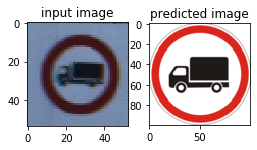

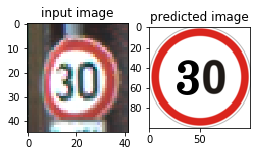

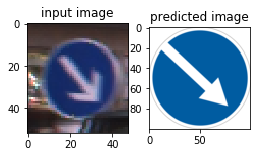

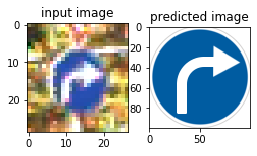

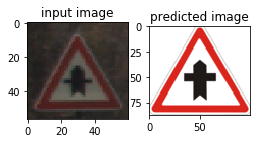

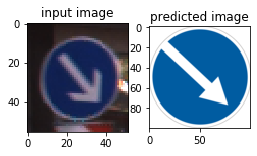

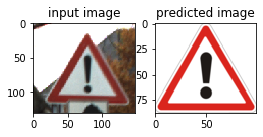

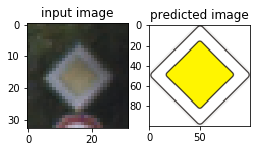

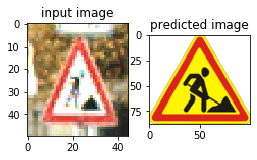

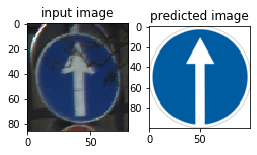

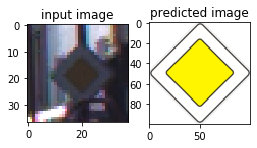

In [8]:
for n, path in enumerate(input_list):
    full_path = base_data_path + '/' + path
    
    x_image = Image.open(full_path)
    
    y_image = Image.open('data/gtsrb-german-traffic-sign/meta/{}.png'.format(y_classes[n]))
    
    fig=plt.figure(figsize=(4, 8))
    
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.set_title("input image")
    plt.imshow(np.asarray(x_image))
    
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.set_title("predicted image")
    plt.imshow(np.asarray(y_image))
    plt.show()
    
    